### Unsupervised Machine Learning - Using Clustering (K-means)
K-means clustering is an unsupervised learning technique suitable  for working with unlabelled data without predefined groups or categories. This algorithm aims to group similar data points with the number of groups determined by the value of k. The algorithm follows an iterative approach and assigns each data point  to one of the k groups based on the features that are provided.

In [39]:
# Importing the required libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore");

In [40]:
# Loading the dataset
df = pd.read_csv("Customers.csv")
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
age_group             0
annual_income         0
spend_score           0
dtype: int64


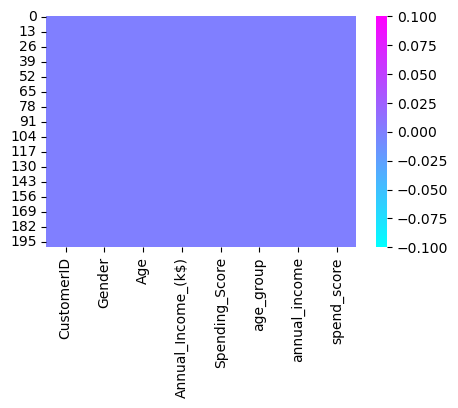

In [88]:
#Further checking, reconfirmation and visualization for missing values
print(df.isnull().sum());

plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), cbar=True,cmap="cool");

There are no missing values noted in the dataset, however the gender heading column was spelt and corrected in the codes below

In [43]:
# Correcting the wrongly spelt column name "genre"
df.columns = ["CustomerID", "Gender", "Age", "Annual_Income_(k$)", "Spending_Score"]

In [44]:
df.head(2)

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81


In [45]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
# Checking for duplicated data
print(df.duplicated().sum())

0


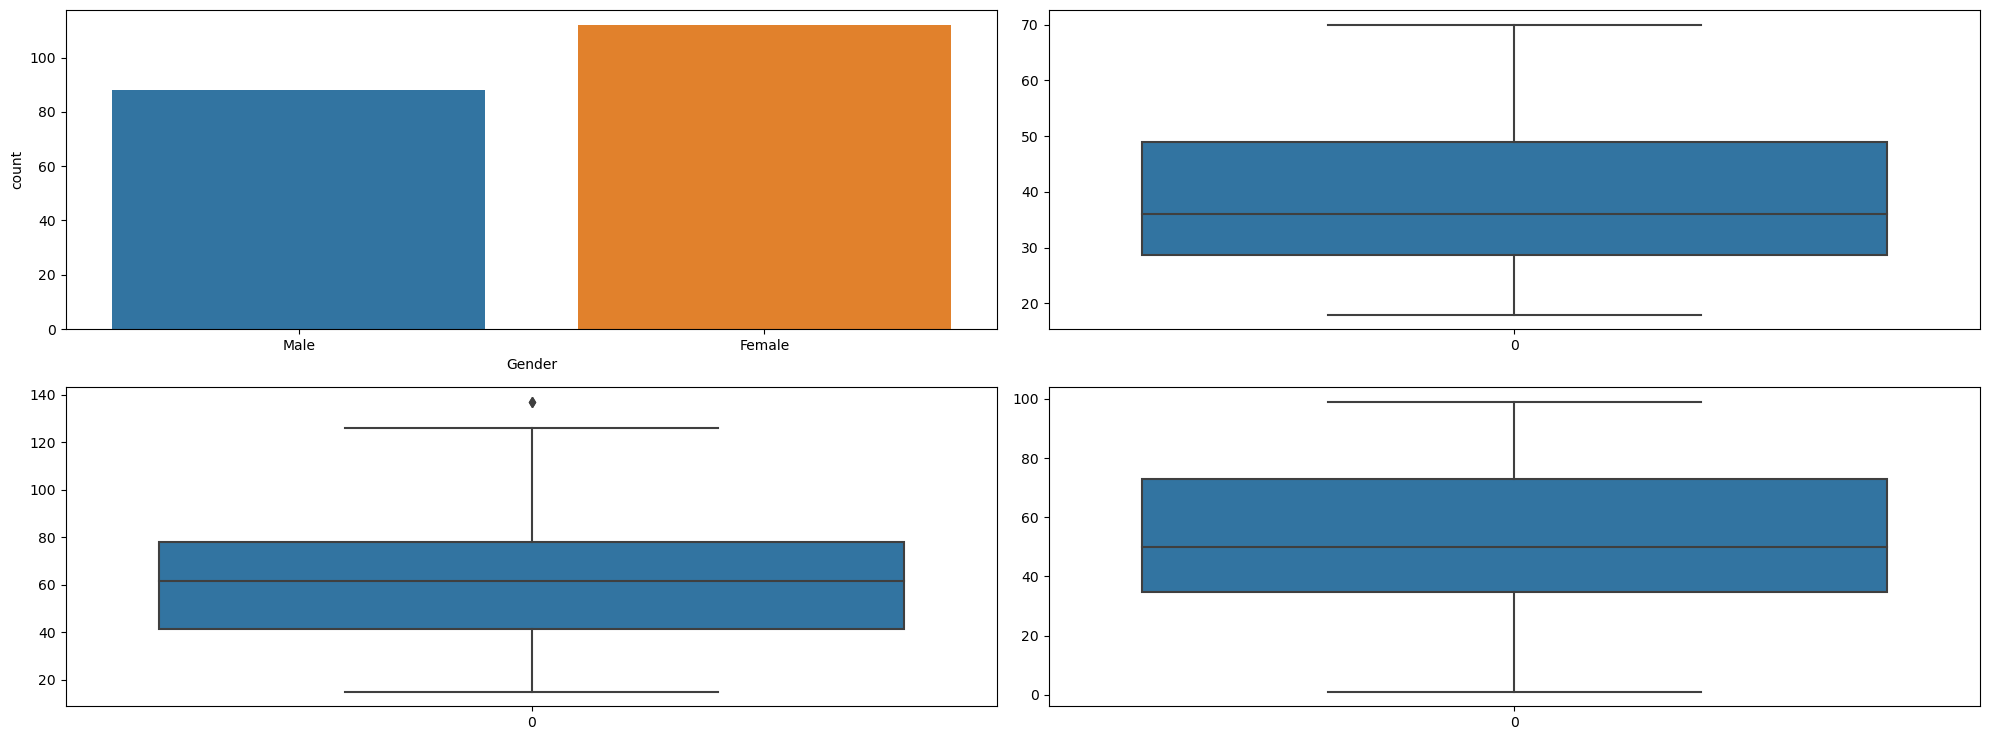

In [28]:
# Checking for outliers 

fig, axs = plt.subplots(2,2, figsize=(20,7.5))
plt1 = sns.countplot(x=df["Gender"], ax= axs[0,0])
plt2 = sns.boxplot(df["Age"], ax=axs[0,1])
plt3 = sns.boxplot(df["Annual_Income_(k$)"], ax=axs[1,0])
plt4 = sns.boxplot(df["Spending_Score"], ax=axs[1,1])
plt.tight_layout()

Only one outlier noted in the Annual Income column

age_group
Young(<=40)    122
Old(<=60)       61
Elder(>60)      17
Name: count, dtype: int64
Gender
Female    112
Male       88
Name: count, dtype: int64


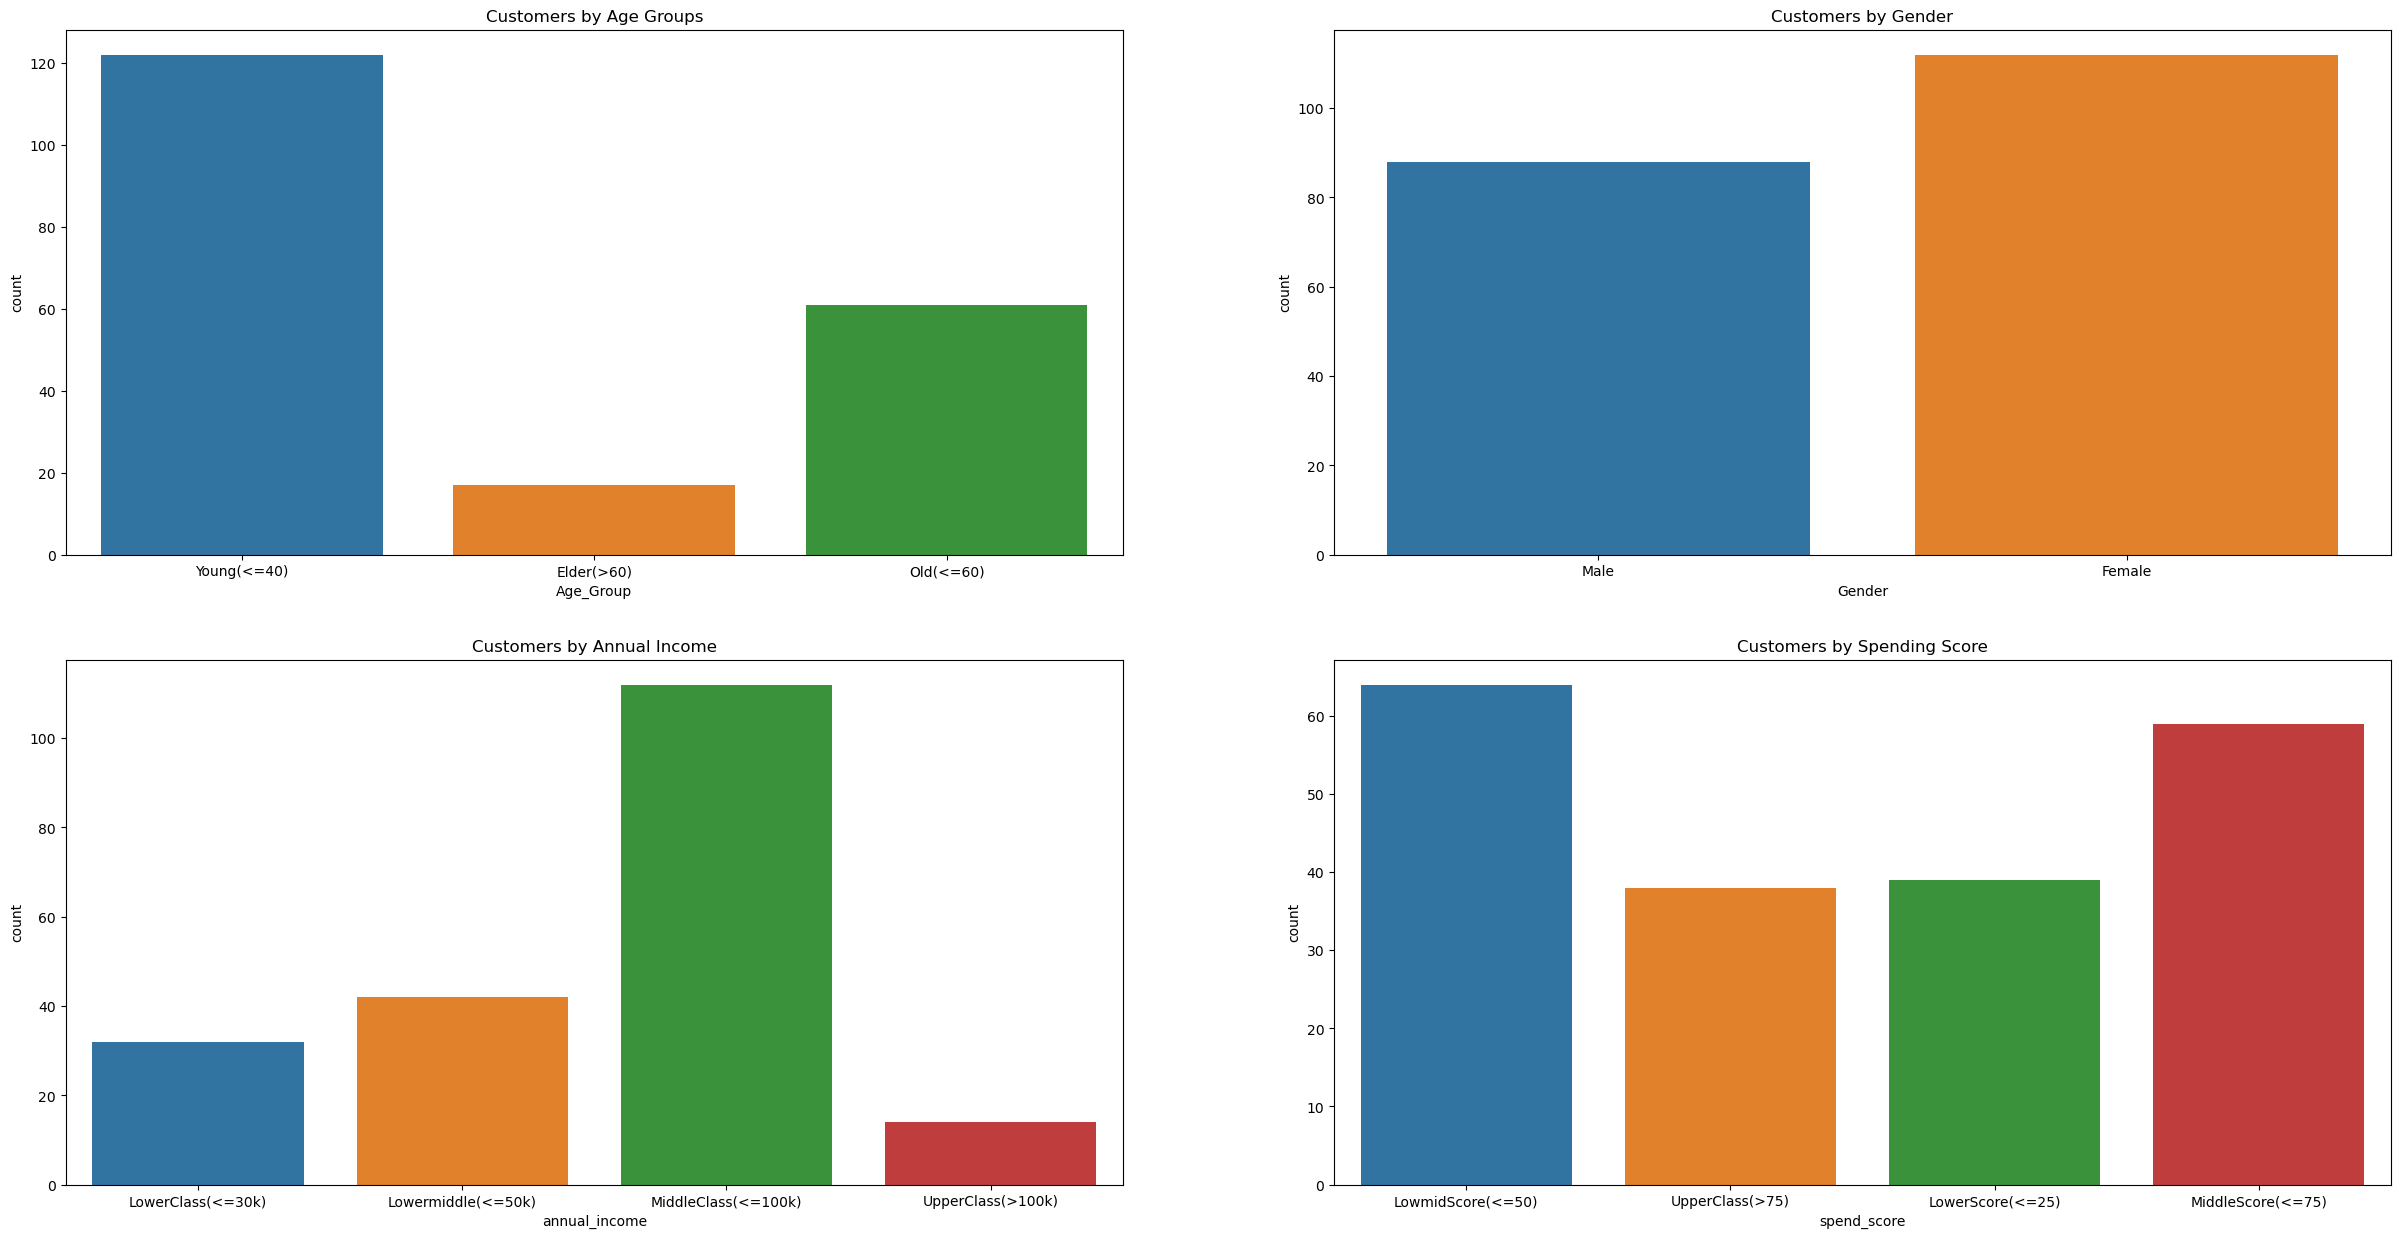

In [112]:
# Exploring the individual features for possible insights into the data (univariate analysis)

print(df["age_group"].value_counts())
print(df["Gender"].value_counts())

# creating a function to group the customers' ages into brackets 
def age_group(age):
    if age <=40:
        return "Young(<=40)"
    elif age <=60:
        return "Old(<=60)"
    else:
        return "Elder(>60)";

df["Age_Group"] = df["Age"].apply(age_group)

# creating a function to group annual income into grades
def ann_income(income):
    if income <=30:
        return "LowerClass(<=30k)"
    elif income <=50:
        return "Lowermiddle(<=50k)"
    elif income <=100:
        return "MiddleClass(<=100k)"
    else:
        return "UpperClass(>100k)";

df["annual_income"] = df["Annual_Income_(k$)"].apply(ann_income)


# Creating a function to group customers' spending score
def spend_score(score):
    if score <=25:
        return "LowerScore(<=25)"
    elif score <=50:
        return "LowmidScore(<=50)"
    elif score <=75:
        return "MiddleScore(<=75)"
    else:
        return "UpperClass(>75)";

df["spend_score"] = df["Spending_Score"].apply(spend_score)

#Visualization
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(30,15))

sns.countplot(x="Age_Group", data=df, ax=axs[0,0])
axs[0,0].set_title("Customers by Age Groups")

sns.countplot(x=df["Gender"], ax= axs[0,1])
axs[0,1].set_title("Customers by Gender")

sns.countplot(x=df["annual_income"], ax= axs[1,0])
axs[1,0].set_title("Customers by Annual Income")

sns.countplot(x=df["spend_score"], ax= axs[1,1])
axs[1,1].set_title("Customers by Spending Score");

The dataset has more customers within the Young age bracket of <=40, slightly more female gender, a lot more in the middle class annual income and spending score category.

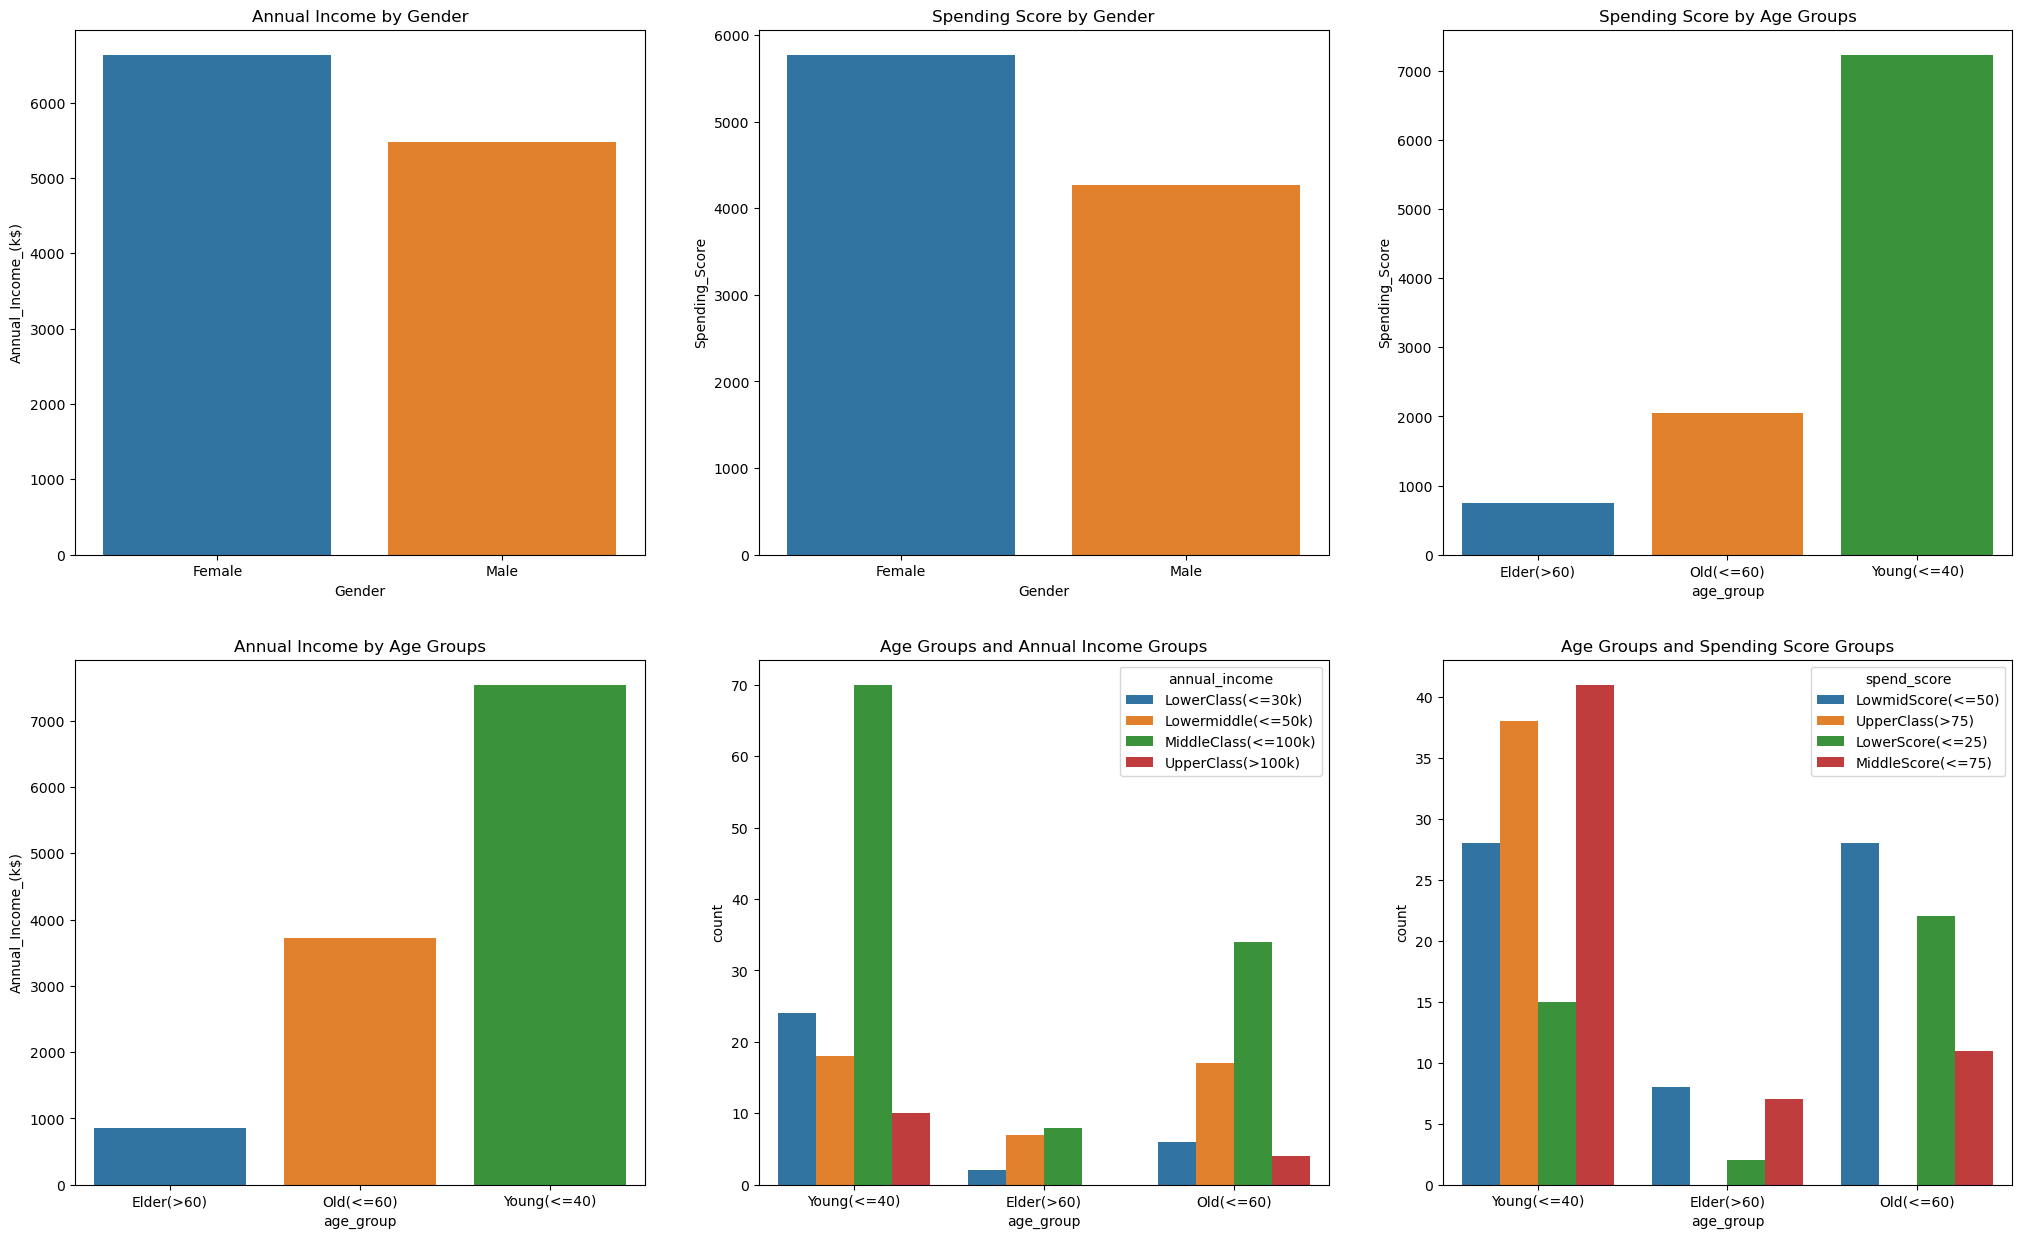

In [115]:
# Exploring the relationships between age, gender, age groups, income, income groups and spending score

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
gender_ann_income = df.groupby("Gender")["Annual_Income_(k$)"].sum().reset_index()
sns.barplot(x ="Gender", data=gender_ann_income, y="Annual_Income_(k$)", ax=axs[0,0])
axs[0,0].set_title("Annual Income by Gender")

gend_ann_income = df.groupby("Gender")["Spending_Score"].sum().reset_index()
sns.barplot(x ="Gender", data=gend_ann_income, y="Spending_Score", ax=axs[0,1])
axs[0,1].set_title("Spending Score by Gender")

age_ann_income = df.groupby("age_group")["Spending_Score"].sum().reset_index()
sns.barplot(x ="age_group", data=age_ann_income, y="Spending_Score", ax=axs[0,2])
axs[0,2].set_title("Spending Score by Age Groups")

Age_ann_income = df.groupby("age_group")["Annual_Income_(k$)"].sum().reset_index()
sns.barplot(x ="age_group", data=Age_ann_income, y="Annual_Income_(k$)", ax=axs[1,0])
axs[1,0].set_title("Annual Income by Age Groups")

sns.countplot(x="age_group", data=df, hue="annual_income", ax=axs[1,1])
axs[1,1].set_title("Age Groups and Annual Income Groups")
plt.xlabel("age_group")

sns.countplot(x="age_group", data=df, hue="spend_score", ax=axs[1,2])
axs[1,2].set_title("Age Groups and Spending Score Groups")
plt.xlabel("age_group");

Its observed from the charts above that the young age group are more in the middleclass income bracket and have more spending score.

In [117]:
# Dropping the extra columns

df = df.drop(columns=["CustomerID", "age_group", "annual_income", "spend_score", "Age_Group" ])
df.head(2)

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81


In [118]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding
encoder = LabelEncoder() # method initialization

#looping for columns except survived
for c in df.columns[1:]:
    if (df[c].dtype=='object'):
        df[c] = encoder.fit_transform(df[c])
    else:
            df[c]=df[c]
            
df.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


After applying the K-means clustering algorithm, we can determine the optimal number of clusters by using the Elbow Method. This method involves plotting the Within Cluster Sum of Squares (WCSS) against the number of clusters (K) and selecting the value of K where the rate of decrease in WCSS slows down significantly. In the graph below, we can observe that after K=3, there is no significant decrease in WCSS, indicating that 3 is the optimal number of clusters in this case. Although the optimal value of K may not always be apparent from the graph, with practice, it becomes easier to identify the elbow point where the rate of decrease in WCSS slows down significantly.

![Alt text](https://i.imgur.com/gi9p7v5.png)


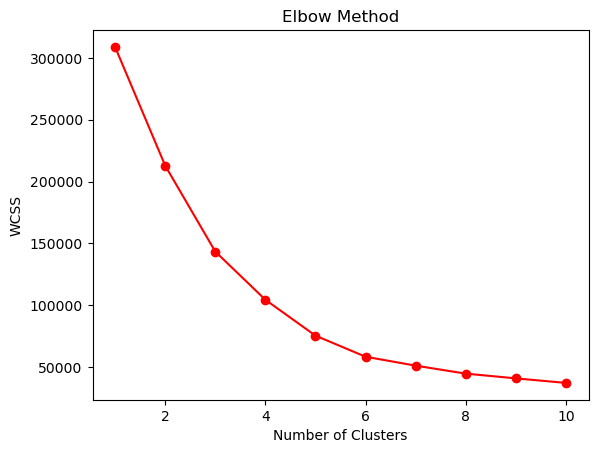

In [120]:
# Determine optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [125]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
kmeans.fit(df)

#Add cluster labels to data
df["Cluster"] = kmeans.labels_


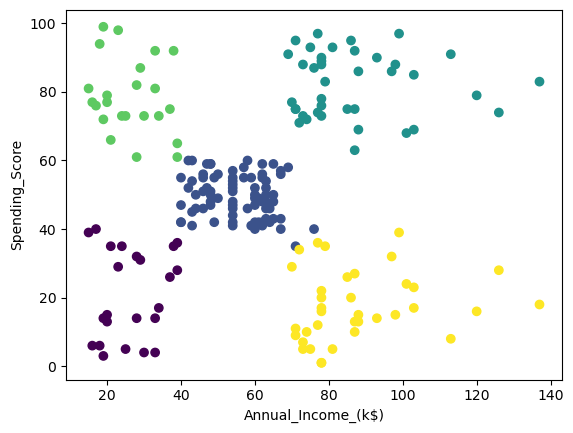

0.44474910239085313

In [126]:
#Visualize cluster results
plt.scatter(df["Annual_Income_(k$)"], df["Spending_Score"], c=df["Cluster"], label="Centroids")
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)


The scatter plot represents customer segmentation which successfully categorized customers into five distinct color-coded groups, revealing patterns in customer behavior based on their Annual Income and Spending Score. These insights provide valuable opportunities for targeted marketing and tailored services:

1. High-income and high-spending customers.
2. High income, low spending customers
3. Low-income, low-spending customers.
4. Low income, high spenders and
5. Mid income earners and mid spenders

Although the clustering revealed meaningful patterns, the moderate silhouette score of 0.445 suggests the need for further exploration.